# Análisis Estadístico Básico
Este notebook incluye análisis estadísticos básicos aplicados al conjunto de datos del archivo proporcionado. Se consideran los siguientes análisis:
- Medidas de tendencia central (media, mediana, moda).
- Medidas de dispersión (varianza, desviación estándar, rango).
- Tablas de frecuencia.
- Medidas de forma (asimetría y curtosis).
- Representación gráfica de datos (histogramas, boxplots).


## 1. Importación de Librerías y Carga de Datos
### Librerías y Datos
Se importan las librerías necesarias y se cargan los datos desde el archivo proporcionado.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('viridis')

# Cargar los datos
file_path = 'Respuestas.xlsx'
sheet_name = 'Respuestas de formulario 1'
df = pd.read_excel(file_path, sheet_name=sheet_name)


,Marca temporal,Edad,Genero,Carrera,¿Cuál es tu nivel de conocimiento sobre Blockchain?,¿Cuál es tu nivel de conocimiento sobre Criptomonedas?,¿Cuál es tu nivel de conocimiento sobre Inteligencia Artificial (IA)?,¿Cuál es tu nivel de conocimiento sobre Machine Learning (ML)?,¿Conoces las aplicaciones de Blockchain en sistemas computacionales?,¿Qué tan actualizado(a) te consideras en las nuevas tecnologías de sistemas computacionales?,...,¿Consideras el uso de Criptomonedas como una tecnología segura?,¿Consideras que el Blockchain es una tecnología útil para la ciberseguridad?,¿Te gustaría que se incluyeran temas sobre Blockchain en los cursos universitarios?,¿Consideras que el uso de Blockchain puede mejorar la transparencia en los sistemas computacionales?,¿Qué tan familiarizado(a) estás con los conceptos de IA?,¿Qué tan familiarizado(a) estás con los conceptos de ML?,¿Consideras que los conocimientos en IA son relevantes para tu futuro profesional?,¿Consideras que los conocimientos en ML son relevantes para tu futuro profesional?,¿Qué tan difícil consideras el aprendizaje de IA y ML?,¿Crees que IA y ML revolucionarán los sistemas computacionales en los próximos años?
0,2024-11-16 01:50:40.292,20,Hombre,Licenciatura en Desarrollo y Gestión del Software,Básico,Básico,Intermedio,Intermedio,Poco,Poco,...,Depende del contexto,No estoy seguro(a),Sí,Sí,Muy familiarizado(a),Bastante,Muy relevantes,Muy relevantes,Bastante difícil,Es práctimente seguro
1,2024-11-16 02:05:34.528,21,Hombre,Licenciatura en Desarrollo de Software,Ninguno,Ninguno,Básico,Básico,No,Poco,...,No estoy seguro(a),No estoy seguro(a),No,No estoy seguro(a),Poco,Poco,Algo relevantes,Algo relevantes,Bastante difícil,Algo probable
2,2024-11-16 02:11:10.320,20,Hombre,Licenciatura en Redes Informáticas,Básico,Básico,Básico,Básico,No,Bastante,...,Sí,Sí,Sí,Sí,Muy familiarizado(a),Bastante,Algo relevantes,Nada relevantes,Muy difícil,Muy probable
3,2024-11-16 10:12:41.885,20,Hombre,Licenciatura en Desarrollo de Software,Básico,Básico,Avanzado,Intermedio,Poco,Muy actualizado(a),...,Depende del contexto,No estoy seguro(a),Sí,Sí,Muy familiarizado(a),Poco,Muy relevantes,Muy relevantes,Poco difícil,Es práctimente seguro
4,2024-11-16 10:44:29.661,32,Hombre,Licenciatura en Desarrollo de Software,Avanzado,Avanzado,Intermedio,Intermedio,Mucho,Bastante,...,Depende del contexto,Sí,Sí,No,Bastante,Poco,Bastante relevantes,Bastante relevantes,Nada difícil,Muy probable


## 2. Medidas de Tendencia Central
### Media, Mediana y Moda
Se calculan las medidas de tendencia central para las columnas numéricas del conjunto de datos.

In [2]:
# Calcular medidas de tendencia central para columnas numéricas
medias = df.mean(numeric_only=True)
medianas = df.median(numeric_only=True)
modas = df.mode().iloc[0]

print('Media por columna:')
print(medias)

print('\nMediana por columna:')
print(medianas)

print('\nModa por columna:')
print(modas)

Media por columna:
Edad    24.366667
dtype: float64

Mediana por columna:
Edad    22.0
dtype: float64

Moda por columna:
Marca temporal                                                                                                       2024-11-16 01:50:40.292000
Edad                                                                                                                                       20.0
Genero                                                                                                                                   Hombre
Carrera                                                                                                  Licenciatura en Desarrollo de Software
¿Cuál es tu nivel de conocimiento sobre Blockchain?                                                                                     Ninguno
¿Cuál es tu nivel de conocimiento sobre Criptomonedas?                                                                                   Básico
¿Cuál es tu niv

## 3. Medidas de Dispersión
### Varianza, Desviación Estándar y Rango
Se analizan las medidas de dispersión para evaluar la variabilidad de los datos.

In [3]:
# Calcular medidas de dispersión
varianzas = df.var(numeric_only=True)
desviaciones = df.std(numeric_only=True)
rangos = df.max(numeric_only=True) - df.min(numeric_only=True)

print('Varianza por columna:')
print(varianzas)

print('\nDesviación estándar por columna:')
print(desviaciones)

print('\nRango por columna:')
print(rangos)

Varianza por columna:
Edad    32.722989
dtype: float64

Desviación estándar por columna:
Edad    5.720401
dtype: float64

Rango por columna:
Edad    23
dtype: int64


### Interpretacion
La varianza de la columna "Edad" es 32.722989, lo que indica que las edades de los individuos en el conjunto de datos tienen una dispersión moderada alrededor de la media. La desviación estándar es 5.720401, lo que significa que, en promedio, las edades difieren de la media en aproximadamente 5.72 años. El rango de la columna "Edad" es 23, lo que muestra la diferencia entre la edad mínima y máxima en el conjunto de datos.

## 4. Tablas de Frecuencia
### Tablas de Frecuencia
Se crean tablas de frecuencia para columnas seleccionadas del conjunto de datos.

In [4]:
# Generar tablas de frecuencia para una columna específica (ejemplo: 'Edad')
if 'Edad' in df.columns:
    bins = [20, 25, 30, 35, 40, 45, 50]
    labels = ['20-25', '25-30', '30-35', '35-40', '40-45', '45-50']
    df['Intervalos'] = pd.cut(df['Edad'], bins=bins, labels=labels, include_lowest=True)

    tabla_frecuencia = df['Intervalos'].value_counts(sort=False).to_frame(name='Frecuencia Absoluta')
    tabla_frecuencia['Frecuencia Relativa'] = tabla_frecuencia['Frecuencia Absoluta'] / len(df)
    tabla_frecuencia['Frecuencia Acumulada'] = tabla_frecuencia['Frecuencia Absoluta'].cumsum()

    print(tabla_frecuencia)
else:
    print('La columna Edad no está disponible para analizar.')

            Frecuencia Absoluta  Frecuencia Relativa  Frecuencia Acumulada
Intervalos                                                                
20-25                        14             0.466667                    14
25-30                         6             0.200000                    20
30-35                         4             0.133333                    24
35-40                         0             0.000000                    24
40-45                         1             0.033333                    25
45-50                         0             0.000000                    25


La tabla de frecuencia muestra la distribución de edades en intervalos de 5 años. La mayoría de los individuos se encuentran en el intervalo de 20-25 años, representando el 46.67% del total. El siguiente intervalo más frecuente es el de 25-30 años con un 20%. Los intervalos de 30-35 y 40-45 años tienen frecuencias menores, mientras que los intervalos de 35-40 y 45-50 años no tienen individuos. La frecuencia acumulada muestra que el 96% de los individuos tienen edades entre 20 y 35 años.
## 5. Medidas de Forma
### Asimetría y Curtosis
Se calculan las medidas de forma para las columnas numéricas del conjunto de datos.

In [5]:
# Calcular medidas de forma
asimetria = df.skew(numeric_only=True)
curtosis = df.kurt(numeric_only=True)

print('Asimetría por columna:')
print(asimetria)

print('\nCurtosis por columna:')
print(curtosis)

Asimetría por columna:
Edad    1.309299
dtype: float64

Curtosis por columna:
Edad    1.646935
dtype: float64


La distribución de las edades tiene una asimetría positiva, lo que significa que hay una mayor concentración de edades más jóvenes con algunos valores de edades más avanzadas que son extremos.
La curtosis positiva indica que la distribución de las edades tiene más valores extremos de lo que se esperaría en una distribución normal, lo que sugiere la presencia de outliers.
En resumen, los datos de la columna "Edad" están sesgados hacia la derecha y tienen una mayor cantidad de valores extremos.
## 6. Visualización de Datos
### Gráficos
Se incluyen gráficos para analizar la distribución y variabilidad de los datos:
- **Histograma** para visualizar la distribución de frecuencias.
- **Boxplot** para identificar valores atípicos.

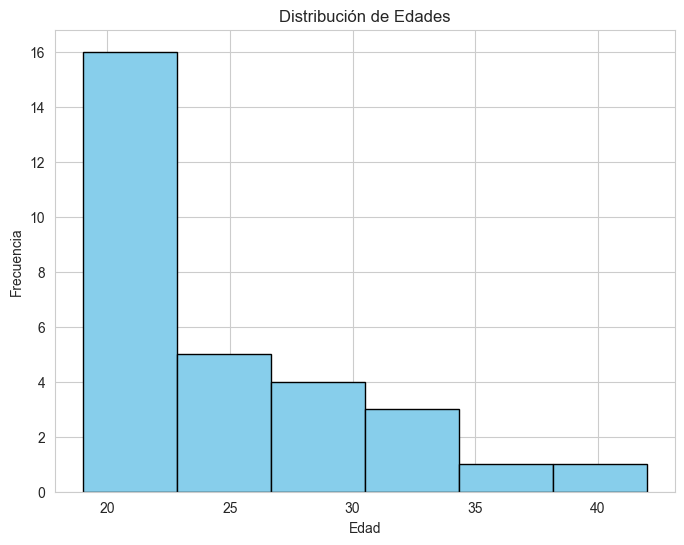

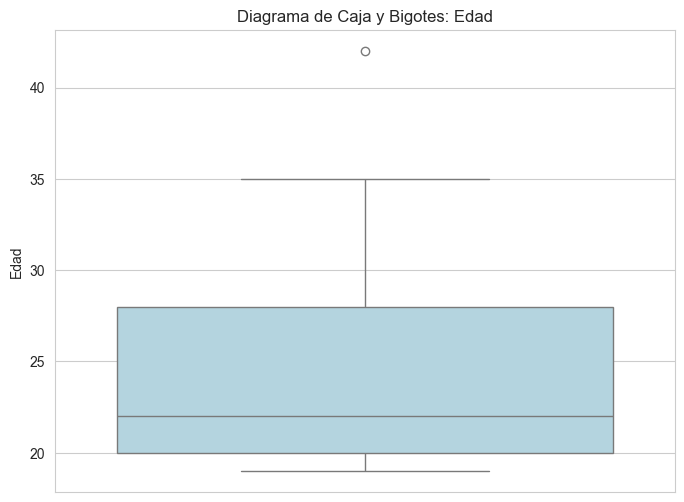

In [6]:
# Histograma para una columna numérica (ejemplo: 'Edad')
if 'Edad' in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df['Edad'], bins=6, color='skyblue', edgecolor='black')
    plt.title('Distribución de Edades')
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')
    plt.show()

    # Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df['Edad'], color='lightblue')
    plt.title('Diagrama de Caja y Bigotes: Edad')
    plt.ylabel('Edad')
    plt.show()
else:
    print('La columna Edad no está disponible para graficar.')